Parte 1

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte '<a href="https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv" > link </a>.

Os campos são:
* **Rank**: posição no ranking de vendas
* **Name**: nome do jogo
* **Platform**: plataforma/console
* **Year**: ano de lançamento
* **Genre**: gênero
* **Publisher**: empresa que publicou o jogo
* **NA_Sales**: vendas na américa do norte (em milhões de dólares)
* **EU_Sales**: vendas na europa (em milhões de dólares)
* **JP_Sales**: vendas no japão (em milhões de dólares)
* **Other_Sales**: outras vendas (em milhões de dólares)
* **Global_Sales**: vendas globais (em milhões de dólares)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados_jogos = pd.read_csv('arquivo/dados/vgsales.csv')
dados_jogos.shape #retorna número linhas e colunas do DataFrame
dados_jogos.head(4) #retorna linhas e colunas com dados do DataFrame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05


In [4]:
#retorna quantidade de registros nulos existentes no DataFrame
nulo = dados_jogos.isnull().sum()
nulo

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

1)Qual foi o jogo mais vendido no mundo em 2010?

In [5]:
jogo_mais_vendido_2010 = dados_jogos['Name'][dados_jogos['Global_Sales'][(dados_jogos['Year'] == 2010)].idxmax()]

print(f'O jogo de video-game mais vendido em 2010 foi "{jogo_mais_vendido_2010}".')

O jogo de video-game mais vendido em 2010 foi "Kinect Adventures!".


In [6]:
#com .query()
jogos_2010 = dados_jogos.query('Year == 2010')

#outra forma de comparação
jogos_2010 = dados_jogos[dados_jogos['Year'] == 2010]

jogo_mais_vendido_2010 = jogos_2010[jogos_2010['Global_Sales'] == jogos_2010['Global_Sales'].max()].max()

print(f'O jogo de video-game mais vendido em 2010 foi "{jogo_mais_vendido_2010["Name"]}".')

O jogo de video-game mais vendido em 2010 foi "Kinect Adventures!".


2)Qual foi o gênero mais vendido na américa do norte em 2005

In [7]:
#com .query()
genero_mais_vendido_america_norte_2005 = dados_jogos.query('Year == 2005').groupby('Genre')['NA_Sales'].sum().idxmax()

#outra forma de comparação
genero_mais_vendido_america_norte_2005 = dados_jogos[dados_jogos['Year'] == 2005].groupby('Genre')['NA_Sales'].sum().idxmax()

print(f'O gênero de jogos de vídeo-game mais vendido na América do Norte no ano de 2005 foi "{genero_mais_vendido_america_norte_2005}".')

O gênero de jogos de vídeo-game mais vendido na América do Norte no ano de 2005 foi "Action".


In [8]:
#com .query()
dados_jogos_2005 = dados_jogos.query('Year == 2005')

#outra forma de comparação
dados_jogos_2005 = dados_jogos[dados_jogos['Year'] == 2005]

genero_mais_vendido_america_norte_2005 = dados_jogos_2005.groupby('Genre')['NA_Sales'].sum().idxmax()

print(f'O gênero de jogos de vídeo-game mais vendido na América do Norte no ano de 2005 foi "{genero_mais_vendido_america_norte_2005}".')

O gênero de jogos de vídeo-game mais vendido na América do Norte no ano de 2005 foi "Action".


3)Qual foi a empresa que mais vendeu de 2005 até 2016

In [9]:
#com .query()
dados_jogos_2005_a_2016 = dados_jogos.query('Year >= 2005 & Year <= 2016')

#outra forma de comparação
dados_jogos_2005_a_2016 = dados_jogos[(dados_jogos['Year'] >= 2005) & ((dados_jogos['Year'] <= 2016))]

dados_jogos_2005_a_2016_agrupado_fabricante = dados_jogos_2005_a_2016.groupby('Publisher')
empresa_que_mais_vendeu_2005_a_2016 = dados_jogos_2005_a_2016_agrupado_fabricante['Global_Sales'].sum().idxmax()

print(f'A empresa que mais vendeu jogos de vídeo-game dentre os anos de 2005 e 2016 foi "{empresa_que_mais_vendeu_2005_a_2016}".')

A empresa que mais vendeu jogos de vídeo-game dentre os anos de 2005 e 2016 foi "Nintendo".


In [10]:
#com .query()
empresa_que_mais_vendeu_2005_a_2016 = dados_jogos.query('Year >= 2005 & Year <= 2016').groupby('Publisher')['Global_Sales'].sum().idxmax()

#outra forma de comparação
empresa_que_mais_vendeu_2005_a_2016 = dados_jogos[(dados_jogos['Year'] >= 2005) & ((dados_jogos['Year'] <= 2016))].groupby('Publisher')['Global_Sales'].sum().idxmax()

print(f'A empresa que mais vendeu jogos de vídeo-game dentre os anos de 2005 e 2016 foi "{empresa_que_mais_vendeu_2005_a_2016}".')

A empresa que mais vendeu jogos de vídeo-game dentre os anos de 2005 e 2016 foi "Nintendo".


4)Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.

In [11]:
#com .query()
dados_jogos_2008 = dados_jogos.query('Year == 2008 & Genre == "Sports"')

#outra forma de comparação
dados_jogos_2008 = dados_jogos[(dados_jogos['Year'] == 2008) & (dados_jogos['Genre'] == "Sports")]

#quantidade mínima de vendas do jogo de vídeo-game menos vendido em 2008
quantidade_vendas_jogo_menos_vendido_2008_sports = dados_jogos_2008['Global_Sales'].min()

#jogos que possuem exatamente a quantidade mínima de vendas do jogo de vídeo-game menos vendido em 2008
jogo_menos_vendido_2008_sports = dados_jogos_2008['Name'][dados_jogos['Global_Sales'] == quantidade_vendas_jogo_menos_vendido_2008_sports]

#imprime os jogos encontrados
print(f'Os jogos de vídeo-game que menos foram vendidos em 2008 do gênero "Sports" foram: \n{jogo_menos_vendido_2008_sports}')

Os jogos de vídeo-game que menos foram vendidos em 2008 do gênero "Sports" foram: 
9691                  Winning Post 7 Maximum 2008
9692                                 Fab 5 Soccer
9694    Major Dream: Major Wii Nagero! Gyroball!!
9696                  Winning Post 7 Maximum 2008
9705                                Family Jockey
9715                             G1 Jockey 4 2008
9731                             Summer Athletics
Name: Name, dtype: object


5)Mostre um gráfico com o total de vendas por ano.

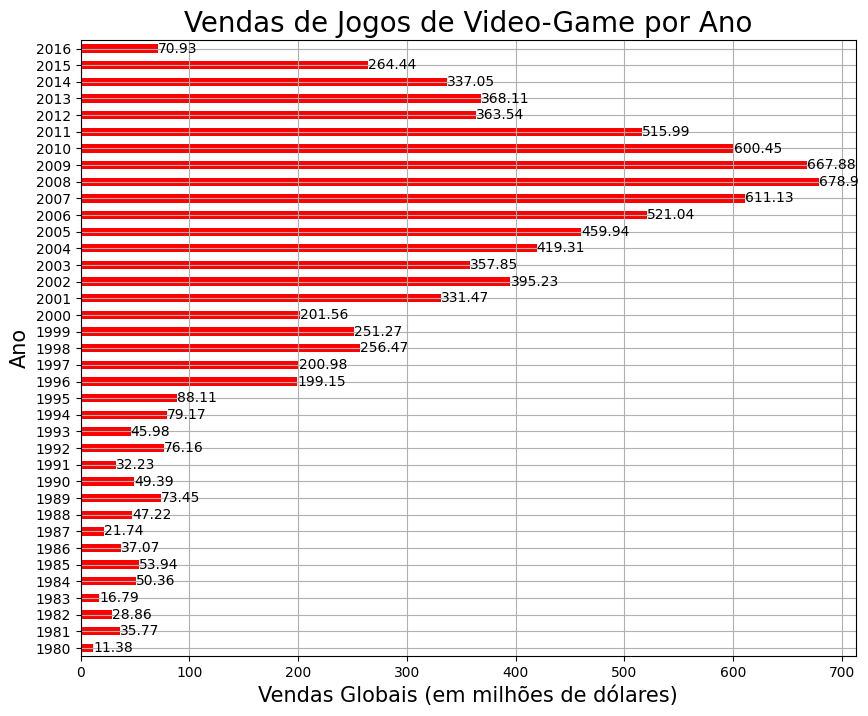

In [12]:
#cria DatFrame com dados agrupados pela coluna "Ano" somando a coluna "Global_Sales"
total_vendas_por_ano = dados_jogos.groupby('Year')['Global_Sales'].sum()

#cria gráfica do tipo barras invertidas (horizontal)
ax = total_vendas_por_ano.plot(kind='barh', figsize=(10,8), grid=True, use_index=True, color='red')

#adiciona valores da coluna "Global_Sales" ao final de cada barra da coluna "Year"
for container in ax.containers:
    ax.bar_label(container)

#propriedades de plotagem do gráfico
plt.title('Vendas de Jogos de Video-Game por Ano', fontsize=20)
plt.ylabel('Ano', fontsize=15)
plt.xlabel('Vendas Globais (em milhões de dólares)', fontsize=15)
plt.show()

6)Qual foi o ano com mais lançamentos de jogos?

In [13]:
#agrupa dados por ano
dados_agrupados_ano = dados_jogos['Year'].value_counts().reset_index()

#encontra a maior ocorrência de registro por ano
maior_numero_lancamentos = dados_jogos['Year'].value_counts().max()

#verifica a partir da quantidade quantos anos possuem a maior quantidade encontrada no agrupamento
ano_mais_lancamentos = dados_agrupados_ano['Year'][dados_agrupados_ano['count'] == maior_numero_lancamentos].max()

#retorna os anos com maior quantidade
print(f'O ano em que houve a maior quantidade de lançamento de jogosa de vídeo-game foi em {ano_mais_lancamentos}.')

O ano em que houve a maior quantidade de lançamento de jogosa de vídeo-game foi em 2009.


7)Qual a plataforma que menos lançou jogos?

In [14]:
#agrupa dados por plataforma
dados_agrupados_plataformas = dados_jogos['Platform'].value_counts().reset_index()

#encontra a menor ocorrência de registro por plataforma
quantidade_lancada_plataforma_menos_lancou = dados_jogos['Platform'].value_counts().min()

#verifica a partir da quantidade quantas plataformas possuem a menor quantidade encontrada no agrupamento
plataforma_menos_lancou = dados_agrupados_plataformas['Platform'][dados_agrupados_plataformas['count'] == quantidade_lancada_plataforma_menos_lancou]

#retorna as plataformas com menor quantidade
print(f'O ano em que houve a maior quantidade de lançamento de jogosa de vídeo-game foi em {plataforma_menos_lancou}.')

O ano em que houve a maior quantidade de lançamento de jogosa de vídeo-game foi em 29      GG
30    PCFX
Name: Platform, dtype: object.


8)Qual plataforma que mais gerou lucros com jogos do gênero Action desde 2009?

In [15]:
#cria DataFrame com dados filtrados pelas colunas "Genre" ("Action") and "Year" (maiores ou igual a 2009)
jogos_action_desde_2009 = dados_jogos.query('Genre == "Action" & Year >= 2009')

#encontra qual é o índice da coluna "Platform" com maior valor de "Global_Sales" somado
plataforma_mais_lucro = jogos_action_desde_2009.groupby('Platform')['Global_Sales'].sum().idxmax()

#imprime o nome da plataforma
print(f'A plataforma que mais gerou lucros com jogos do genêro "Action" desde 2009 foi {plataforma_mais_lucro}.')

A plataforma que mais gerou lucros com jogos do genêro "Action" desde 2009 foi PS3.


9)Qual empresa teve o maior lucro (sob o teto de 0.35 milhões) de 1980 até 1995, excluindo-se a plataforma SNES.

In [16]:
#Dados entre 1980 e 1995
dados_1980_a_1995 = dados_jogos.query('Year >= 1980 & Year <= 1995')

#Dados entre 1980 e 1995 sem plataforma SNES
dados_1980_a_1995_sem_snes = dados_1980_a_1995.query('Platform != "SNES"')

#Dados entre 1980 e 1995 sem plataforma SNES agrupados por empresa somando vendas globais
dados_1980_a_1995_sem_snes_por_empresa = dados_1980_a_1995_sem_snes.groupby('Publisher')['Global_Sales'].sum().reset_index()

#Empresas com vendas globais iguais ou inferiores a 0.35 entre 1980 e 1995 sem plataforma SNES
dados_1980_a_1995_sem_snes_por_empresa_menor_035 = dados_1980_a_1995_sem_snes_por_empresa[dados_1980_a_1995_sem_snes_por_empresa['Global_Sales'] <= 0.35]

#Maior lucro encontrado entre 1980 e 1995 sem plataforma SNES com vendas globais iguais ou inferiores a 0.35
maior_lucro_teto_035 = dados_1980_a_1995_sem_snes_por_empresa_menor_035['Global_Sales'].max()

#Empresas que tiveram exatamente o maior lucro encontrado entre 1980 e 1995 sem plataforma SNES com vendas globais iguais ou inferiores a 0.35
empresas_maior_lucro = dados_1980_a_1995_sem_snes_por_empresa_menor_035['Publisher'][dados_1980_a_1995_sem_snes_por_empresa_menor_035['Global_Sales'] == maior_lucro_teto_035].max()

#mostra as empresas
print(f'A empresa que obteve o maior lucro entre 1980 e 1995, sob o teto de U$ 0,350 mihões, excluindo a plataforma "SNES" foi {empresas_maior_lucro}.')

A empresa que obteve o maior lucro entre 1980 e 1995, sob o teto de U$ 0,350 mihões, excluindo a plataforma "SNES" foi ITT Family Games.


10)A empresa que mais lucrou no Japão em 2003 é a mesma que mais lucrou na europa nesse mesmo ano?

In [17]:
#Dados em 2003
dados_2003 = dados_jogos.query('Year == 2003')

In [18]:
#Dados de 2003 agrupados por empresas somando valores de venda no Japão
somatorio_lucro_japao_2003_empresa = dados_2003.groupby('Publisher')['JP_Sales'].sum().reset_index()

#Maior lucro encontrado nos dados de 2003 para empresas em valores de venda no Japão
maior_lucro_japao_2003 = somatorio_lucro_japao_2003_empresa['JP_Sales'].max()

#Empresas que possuem exatamente o maior lucro encontrado nos dados de 2003 para valores de venda no Japão
empresa_maior_lucro_japao_2003 = somatorio_lucro_japao_2003_empresa['Publisher'][somatorio_lucro_japao_2003_empresa['JP_Sales'] == maior_lucro_japao_2003].max()

print(f'A empresa que mais lucrou no Japão em 2003 foi "{empresa_maior_lucro_japao_2003}".')

A empresa que mais lucrou no Japão em 2003 foi "Nintendo".


In [26]:
#Dados de 2003 agrupados por empresas somando valores de venda na Europa
somatorio_lucro_europa_2003_empresa = dados_2003.groupby('Publisher')['EU_Sales'].sum().reset_index()

#Maior lucro encontrado nos dados de 2003 para empresas em valores de venda na Europa
maior_lucro_europa_2003 = somatorio_lucro_europa_2003_empresa['EU_Sales'].max()

#Empresas que possuem exatamente o maior lucro encontrado nos dados de 2003 para valores de venda na Europa
empresa_maior_lucro_europa_2003 = somatorio_lucro_europa_2003_empresa['Publisher'][somatorio_lucro_europa_2003_empresa['EU_Sales'] == maior_lucro_europa_2003].max()

print(f'A empresa que mais lucrou na Europa em 2003 foi "{empresa_maior_lucro_europa_2003}".')

A empresa que mais lucrou na Europa em 2003 foi "Electronic Arts".


In [38]:
#Dados de 2003 agrupados por empresas somando valores de venda na Europa
maior = dados_jogos.groupby('Publisher')['EU_Sales'].max()
print(maior)

418.3


In [20]:
#compara se foram ou não as mesmas empresas que obtiveram maior lucro no Japão e Europa em 2003
if (empresa_maior_lucro_japao_2003 != empresa_maior_lucro_europa_2003):
    print(f'A empresa que mais lucrou com vendas de jogos de víde-game no Japão em 2003 não é a mesma que mais lucrou no mesmo período para o mesmo tipo de venda na Europa.')
else:
    print(f'Em 2003, a empresa que mais lucrou com vendas de vídeo-game no Japão é a mesma que mais lucrou na Europa.')

A empresa que mais lucrou com vendas de jogos de víde-game no Japão em 2003 não é a mesma que mais lucrou no mesmo período para o mesmo tipo de venda na Europa.


11)Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?

In [21]:
#Criando coluna no DataFrame contendo dados de Vendas Globais, excluindo America do Norte, Europa e Japão
dados_jogos['Global_Sales_Whitout_AN_JP_EU'] = dados_jogos['Global_Sales'] - (dados_jogos['NA_Sales'] + dados_jogos['EU_Sales'] + dados_jogos['JP_Sales'])

#Dados de 2006 a 2010
dados_2006_2010 = dados_jogos.query('Year >= 2006 & Year < 2010')

#Número de Vendas Globais sem AN, EU e Japão entre 2006 e 2010
total_vendas_2006_2010 = dados_2006_2010['Global_Sales_Whitout_AN_JP_EU'].sum()

#Dados das Vendas Globais do Wii sem AN, EU e Japão entre 2006 e 2010
vendas_wii_2006_2010 = dados_2006_2010.query('Platform == "Wii"')

#Número de Vendas Globais do Wii sem AN, EU e Japão entre 2006 e 2010
total_vendas_wii_2006_2010 = vendas_wii_2006_2010['Global_Sales_Whitout_AN_JP_EU'].sum()

#Percentual de Vendas Globais do Wii sem AN, EU e Japão entre 2006 e 2010
percentual_total_vendas_wii_2006_2010 = (total_vendas_wii_2006_2010 * 100) / total_vendas_2006_2010

#Demonstra em tela as informações
print(f'Vendas Totais: U$ {total_vendas_2006_2010:.2f}\n'
      f'Vendas Wii: U$ {total_vendas_wii_2006_2010:.2f}\n'
      f'Percentual: {percentual_total_vendas_wii_2006_2010:.2f}%.')

Vendas Totais: U$ 291.07
Vendas Wii: U$ 60.88
Percentual: 20.92%.


12)Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.

In [22]:
import matplotlib.pyplot as plt
vendas_plataforma = dados_jogos.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()
vendas_plataforma

,Platform,Year,Global_Sales
0,2600,1980,11.38
1,2600,1981,35.77
2,2600,1982,28.86
3,2600,1983,5.83
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.60
235,XOne,2014,52.43
236,XOne,2015,57.66


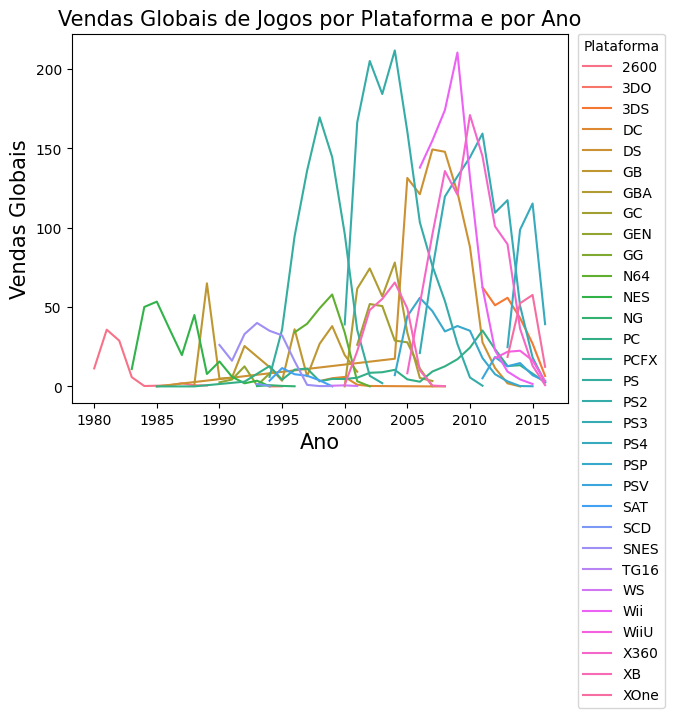

In [23]:
#cria DataFrame com informações agrupadas por plataforma e ano, somando vandas globais
vendas_plataforma = dados_jogos.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()

#Cria gráfico de linha pelo seaborn
sns.lineplot(data = vendas_plataforma, y='Global_Sales', x='Year', hue='Platform')

#cria legenda e posiciona do lado de fora d gráfico
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Plataforma')

#título do gráfico
plt.title('Vendas Globais de Jogos por Plataforma e por Ano', fontsize=15)

#legenda eixo x
plt.xlabel('Ano', fontsize=15)

#legenda eixo y
plt.ylabel('Vendas Globais', fontsize=15)

#mostra o gráfico
plt.show()

13)Mostre um gráfico de pizza com o percentual de vendas dos diferentes
gêneros de jogos.

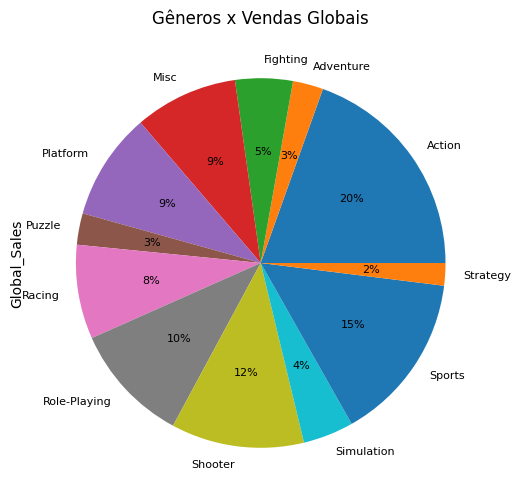

In [24]:
#cria DataFrame com dados filtrados pela coluna "Genre" com dados da coluna "Global_Sales" somados
#criado um gráfico do tipo "Pie Chart"
dados_jogos.groupby('Genre')['Global_Sales'].sum().plot(kind='pie', y='Genre', autopct='%1.0f%%', figsize=(12,6), fontsize=8)

#Informado título do gráfico
plt.title('Gêneros x Vendas Globais')

plt.show()